# Árvores

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Árvores de decisão

<img src="https://miro.medium.com/max/899/0*Wy3QjtXL9qf-Ssyz.jpg" width=800>

###  

## Árvores de Decisão

Para começar vamos entender qual é a estrutura de uma árvore de decisão:

<img src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1" width=600>

###  

**Alguns exemplos de aplicações de Árvores de Decisão:** <br>

<img src="https://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/uploads/RTEmagicC_arv_dec4_01.gif.gif" width=500>

<br><br>

<img src="https://didatica.tech/wp-content/uploads/2020/07/image-3.png" width=500>

<br><br>

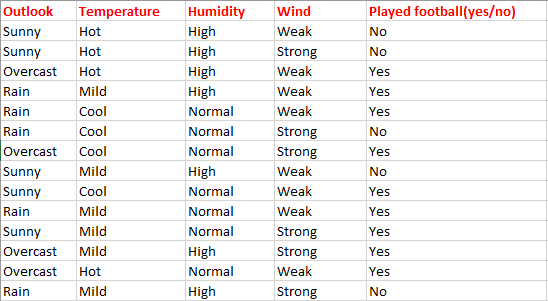

Quando trabalhamos com múltiplas variáveis, como definir qual variável vamos utilizar primeiro para o Nó?

Vamos utilizar o exemplo de uma amostra de 30 alunos com duas variáveis: Sexo (menino ou menina), Classe (IX ou X). Além disso 15 dos 30 alunos jogam tênis no intervalo. Dado isso, a pergunta que fica é: **Qual variável/feature utilizar para fazer a quebra do nó raiz: sexo ou classe?**

Há duas possibilidades de quebras:

<img src="https://i2.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo-Tutorial_completo_arvore_decisao_03.jpg?resize=617%2C293&ssl=1" width=500>

Vemos que, **dependendo da feature que utilizamos pra fazer a quebra**, conseguimos **graus de separações diferentes dos dados com relação ao target**.

Como decidir então, qual das quebras acima **separou melhor os dados com relação ao target?**

Matematicamente, o modelo pode usar dois critérios diferentes para decidir como fazer as quebras na árvore: o **critério de Gini** ou o **critério da entropia**.

###  

### **Critério de Gini**

A **impureza de Gini** mede o quão "impuras" são as folhas das árvores construídas após as quebras nos nós. O coeficiente é dado por:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Onde $p_i$ são as proporções de separação do target em cada quebra.

OBS:   
- É **PROPORÇÃO** e **NÃO PROBABILIDADE**. Proporção eu tenho certeza, probabilidade não.  
- Indíce zero(0) é um nó puro
    - Todos os elementos são da mesma classe  
  
Aqui estaremos interessados **em como a impureza muda após as quebras**. Nosso objetivo será **maximizar a purificação proporcionada pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona a maior purificação**.

<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>


- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados:

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:

- Divisão por **sexo**: após a divisão dos dados pela feature **sexo**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{meninas}) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
    
    - $G(\text{meninos}) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada:
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{10}{30} \times G(\text{meninas}) + \frac{20}{30} \times G(\text{meninos})
    = 0.33 \times 0.319 + 0.66 \times 0.454
    = 0.40491$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **sexo** é de:
    
    <br>
    
    - $\Delta G_{\text{sexo}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.40491 = $ **0.095**
    
    
<br>

<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Classe IX</center></td>
    <td colspan="2"><center>Classe X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>



- Divisão por **classe**: após a divisão dos dados pela feature **classe**, passamos a ter as seguintes impurezas, segundo a tabela acima:

    - $G(\text{IX}) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
    
    - $G(\text{X}) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$
    
    Ou seja, após a divisão, a impureza total passa a ser a média ponderada:
    
    <br>
    
    - $G(\text{pós-divisão}) = \frac{14}{30} \times G(\text{IX}) + \frac{16}{30} \times G(\text{X})
    = 0.46 \times 0.489 + 0.53 \times 0.492
    = 0.4857$
    
    Assim, **a perda de impureza proporcionada pela quebra** dos dados segundo a feature **classe** é de:
    
    <br>
    
    - $\Delta G_{\text{classe}} = G(\text{pré-divisão}) - G(\text{pós-divisão}) = 0.5 - 0.4857 = $ **0.014**
  
Agora, como escolher a melhor quebra?

> O **critério de Gini** consiste em **escolher a quebra que proporciona a maior perda de impureza**, ou, equivalentemente, **a maior purificação**.

Assim, a divisão a ser escolhida seria por **sexo**.

Depois, aplica-se o mesmo procedimento para os nós resultantes.

###  

### **Critério de entropia**

A **entropia** é uma quantidade definida em física e teoria da informação com o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$E = -\sum{p_{i} \times \log_{2}{p_{i}}}$$


Onde $p_i$ são as proporções de separação do target em cada quebra.

Aqui estaremos interessados **em como a impureza muda após as quebras**.

Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**:

$$E(pré-divisão) = -1 \times (\frac{15}{30}log_{2}{\frac{15}{30}} + \frac{15}{30}log_{2}{\frac{15}{30}}) = 1$$


Temos duas quebras possíveis:

- Divisão por sexo:

    - $E(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $E(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{10}{30} \times E(\text{meninas}) + \frac{20}{30} \times E(\text{meninos}) =  0.863$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta E_{\text{sexo}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- Divisão por classe:

    - $E(\text{IX}) = -1 \times (\frac{6}{14} \log_{2}\frac{6}{14} + \frac{8}{14} \log_{2}\frac{8}{14}) = 0.985$
    - $E(\text{X}) = -1 \times (\frac{9}{16} \log_{2}\frac{9}{16} + \frac{7}{16} \log_{2}\frac{7}{16}) = 0.988$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $E(\text{pós-divisão}) = \frac{14}{30} \times E(\text{IX}) + \frac{16}{30} \times E(\text{X}) =  0.986$
    
    Assim, o ganho de informação após a divisão por **classe** é:
    
    <br>
    
    - $\Delta E_{\text{classe}} = E(\text{pré-divisão}) - E(\text{pós-divisão}) = 1 - 0.986 =$ **0.014**

Também pela entropia, a divisão a ser escolhida seria por **sexo**.

Depois, **aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros**.

###  

A **diferença do Gini e da Entropia** é minimamente computacional, e olhando para o lado do resultado do modelo apesar das medidas poderem ser semelhantes.

E qual critério utilizar? (Caso encontre novas referências compartilhe)  
https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf
- We found that they disagree only in 2% of all cases
- Calcular log é mais caro computacionalmente
- A "vantagem" logaritmica é justamente quando o valor percorre uma gama grande de valores

### Exemplos

Vamos a nosso exemplo prático?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Para esse exemplo iremos utilizar um dataset sobre [Heart Failure](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data), para ter mais detalhes sobre a base de dados, podemos dar uma olhada na documentação no Kaggle.

In [2]:
df = pd.read_csv('ICUOutputGravidadeKmeansRandomsemMM.csv')

dataset_backup=df.copy()
df.head()

,subject_id,noraTo025days,nora025to050days,noraupto050days,norafreedays,vaso_days,hemodialysis,MV_return,MV_start,MV_stay,MV_weaning,cluster
0,18926356,0,0,0,100,0,0,0,0,0,0,1
1,18300417,0,0,0,100,0,1,0,0,0,0,1
2,19886408,0,0,0,100,0,0,0,0,0,0,1
3,12685954,0,0,0,100,0,0,0,0,0,0,1
4,13104415,0,0,0,100,0,0,0,0,0,0,1


In [3]:
df.shape

(7493, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   subject_id        7493 non-null   int64
 1   noraTo025days     7493 non-null   int64
 2   nora025to050days  7493 non-null   int64
 3   noraupto050days   7493 non-null   int64
 4   norafreedays      7493 non-null   int64
 5   vaso_days         7493 non-null   int64
 6   hemodialysis      7493 non-null   int64
 7   MV_return         7493 non-null   int64
 8   MV_start          7493 non-null   int64
 9   MV_stay           7493 non-null   int64
 10  MV_weaning        7493 non-null   int64
 11  cluster           7493 non-null   int64
dtypes: int64(12)
memory usage: 702.6 KB


In [5]:
df.isnull().sum()

subject_id          0
noraTo025days       0
nora025to050days    0
noraupto050days     0
norafreedays        0
vaso_days           0
hemodialysis        0
MV_return           0
MV_start            0
MV_stay             0
MV_weaning          0
cluster             0
dtype: int64

In [6]:
df = df.iloc[0:, 1:12]

df.head()

,noraTo025days,nora025to050days,noraupto050days,norafreedays,vaso_days,hemodialysis,MV_return,MV_start,MV_stay,MV_weaning,cluster
0,0,0,0,100,0,0,0,0,0,0,1
1,0,0,0,100,0,1,0,0,0,0,1
2,0,0,0,100,0,0,0,0,0,0,1
3,0,0,0,100,0,0,0,0,0,0,1
4,0,0,0,100,0,0,0,0,0,0,1


Documentação para o [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [7]:
X = df.drop(columns=['cluster'])
y = df['cluster']

In [8]:
#y.value_counts(normalize=True)
y.value_counts(normalize=False)

cluster
1    5175
2    1312
3     670
0     336
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

Se você tiver distribuições de classes desbalanceadas em sua variável alvo, pode usar a estratificação para garantir que as proporções de classes sejam preservadas nos conjuntos de treino e teste. Use stratify=y na chamada da função (sendo y a sua variável alvo).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier(random_state=42)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print('\t\t\t\tTEST\n', classification_report(y_test, y_pred))

				TEST
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       101
           1       1.00      1.00      1.00      1552
           2       0.98      0.99      0.98       394
           3       0.97      0.97      0.97       201

    accuracy                           0.99      2248
   macro avg       0.98      0.97      0.98      2248
weighted avg       0.99      0.99      0.99      2248



In [17]:
y_pred_train = model.predict(X_train)

In [18]:
print('\t\t\t\tTRAIN\n', classification_report(y_train, y_pred_train))

				TRAIN
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00      3623
           2       1.00      1.00      1.00       918
           3       1.00      1.00      1.00       469

    accuracy                           1.00      5245
   macro avg       1.00      1.00      1.00      5245
weighted avg       1.00      1.00      1.00      5245



Para os modelos de árvores, conseguimos plotar como que fica a quebra nos Nós:

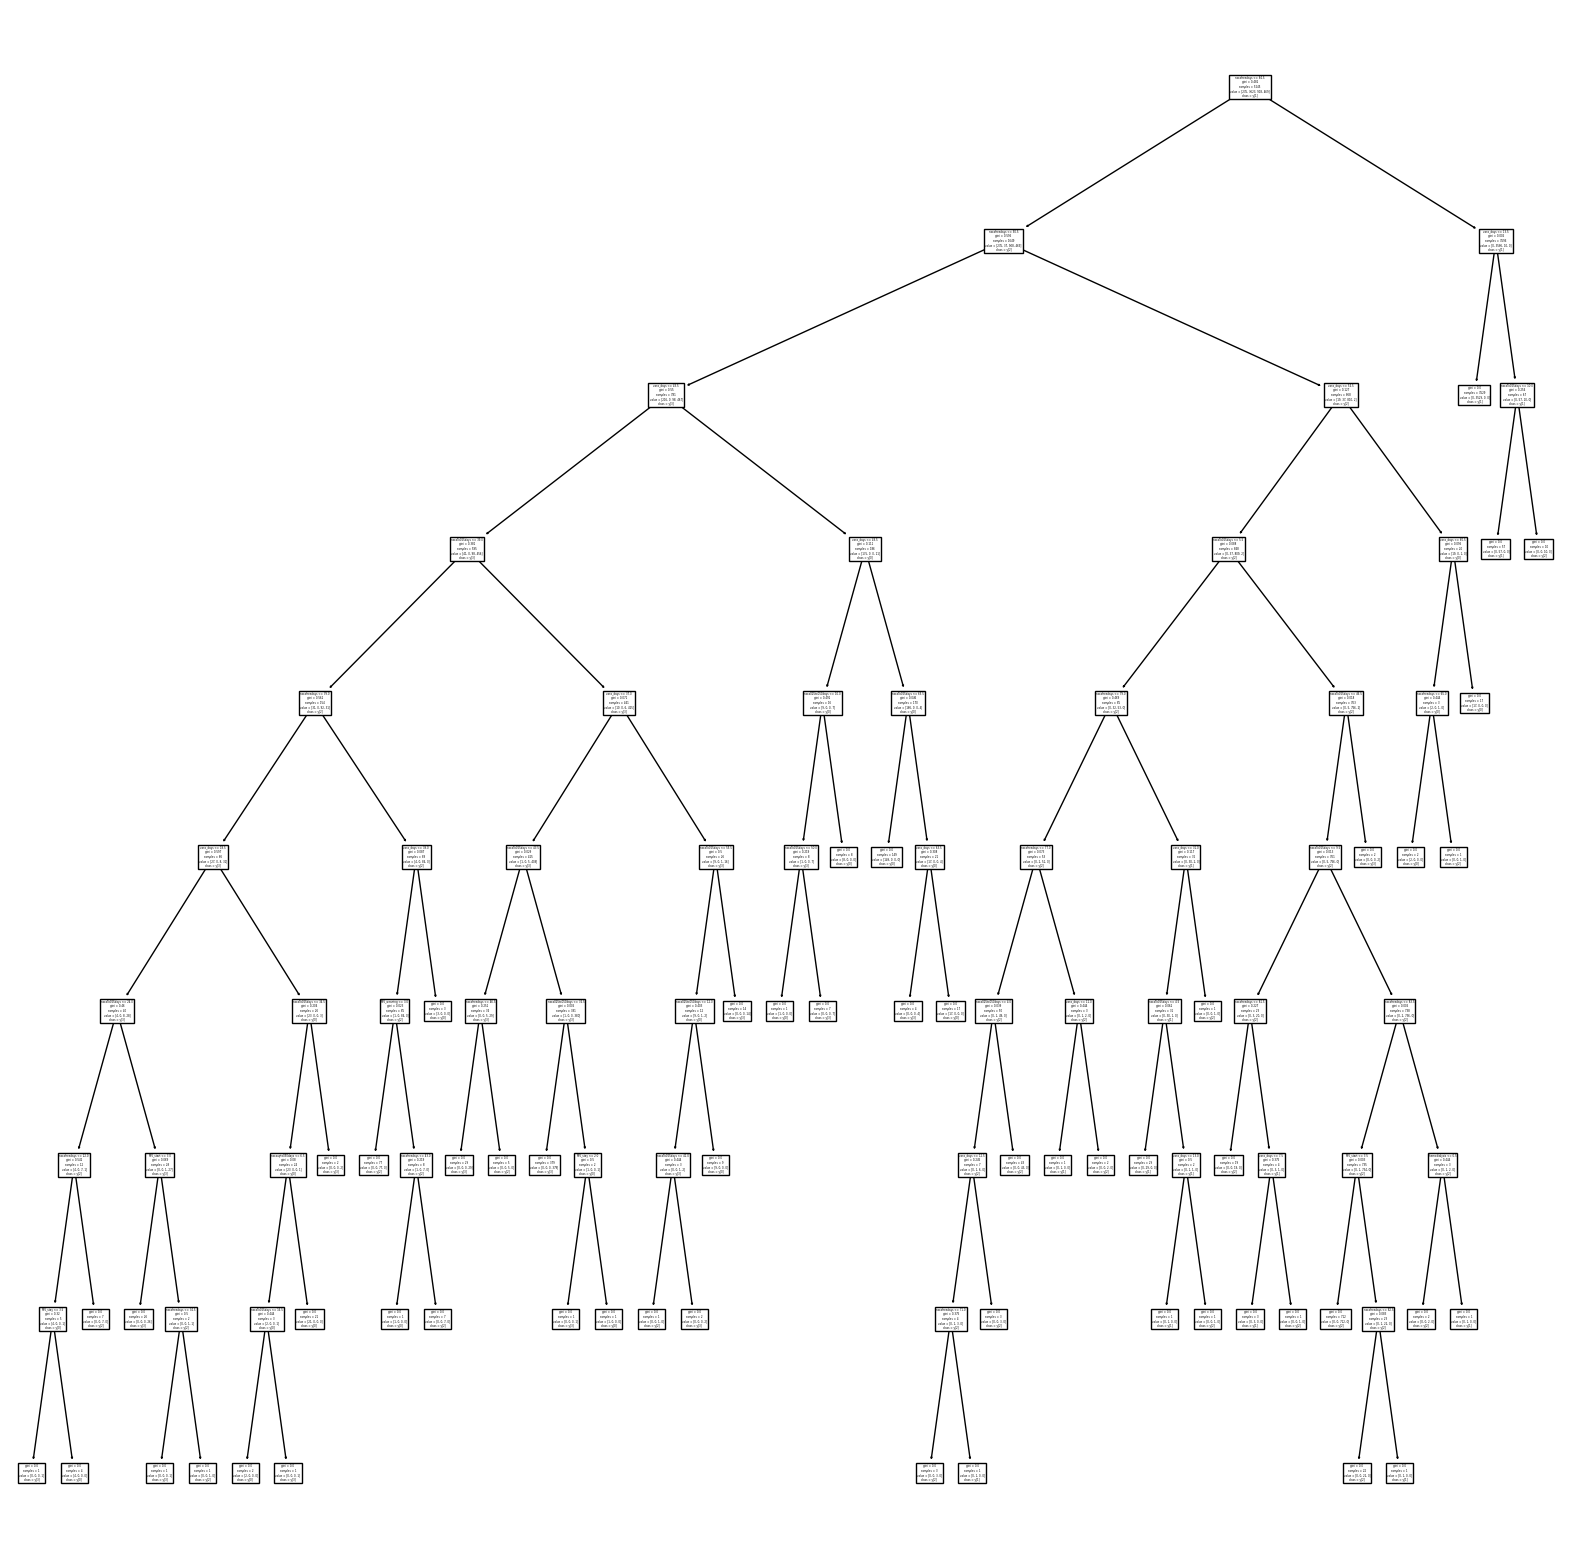

In [19]:
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=df.columns, class_names=True)
plt.show()

In [ ]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold
values = model.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 61 nodes and has the following tree structure:

node=0 is a split node with value=[[ 895.  623. 1202. 1966.  559.]]: go to node 1 if X[:, 4] <= 0.25 else to node 26.
	node=1 is a split node with value=[[   0.  459. 1202.    0.  559.]]: go to node 2 if X[:, 5] <= 0.4449999928474426 else to node 9.
		node=2 is a split node with value=[[0.00e+00 3.01e+02 1.20e+03 0.00e+00 1.00e+00]]: go to node 3 if X[:, 3] <= 0.5000000149011612 else to node 8.
			node=3 is a split node with value=[[0.0e+00 0.0e+00 1.2e+03 0.0e+00 1.0e+00]]: go to node 4 if X[:, 5] <= 0.4350000023841858 else to node 5.
				node=4 is a leaf node with value=[[   0.    0. 1195.    0.    0.]].
				node=5 is a split node with value=[[0. 0. 5. 0. 1.]]: go to node 6 if X[:, 0] <= 0.5 else to node 7.
					node=6 is a leaf node with value=[[0. 0. 5. 0. 0.]].
					node=7 is a leaf node with value=[[0. 0. 0. 0. 1.]].
			node=8 is a leaf node with value=[[  0. 301.   0.   0.   0.]].
		node=9 is a split n

###  

In [20]:
#criando um dicionário com as variáveis
dic = {'score':model.feature_importances_,'features':X.columns}
#criando um dataframe com os dados
df1 = pd.DataFrame(dic).sort_values('score',ascending=False)
df1
#dic

,score,features
3,0.817287,norafreedays
4,0.104609,vaso_days
0,0.071533,noraTo025days
1,0.004296,nora025to050days
8,0.001028,MV_stay
5,0.000527,hemodialysis
7,0.000400,MV_start
2,0.000231,noraupto050days
9,0.000090,MV_weaning
6,0.000000,MV_return


Vamos mexer no parâmetro de profundidade

				TEST
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       101
           1       1.00      0.99      1.00      1552
           2       0.96      0.97      0.97       394
           3       0.88      0.95      0.91       201

    accuracy                           0.98      2248
   macro avg       0.93      0.92      0.92      2248
weighted avg       0.98      0.98      0.98      2248

				TRAIN
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       235
           1       1.00      1.00      1.00      3623
           2       0.99      0.98      0.99       918
           3       0.90      0.99      0.94       469

    accuracy                           0.99      5245
   macro avg       0.97      0.95      0.96      5245
weighted avg       0.99      0.99      0.99      5245



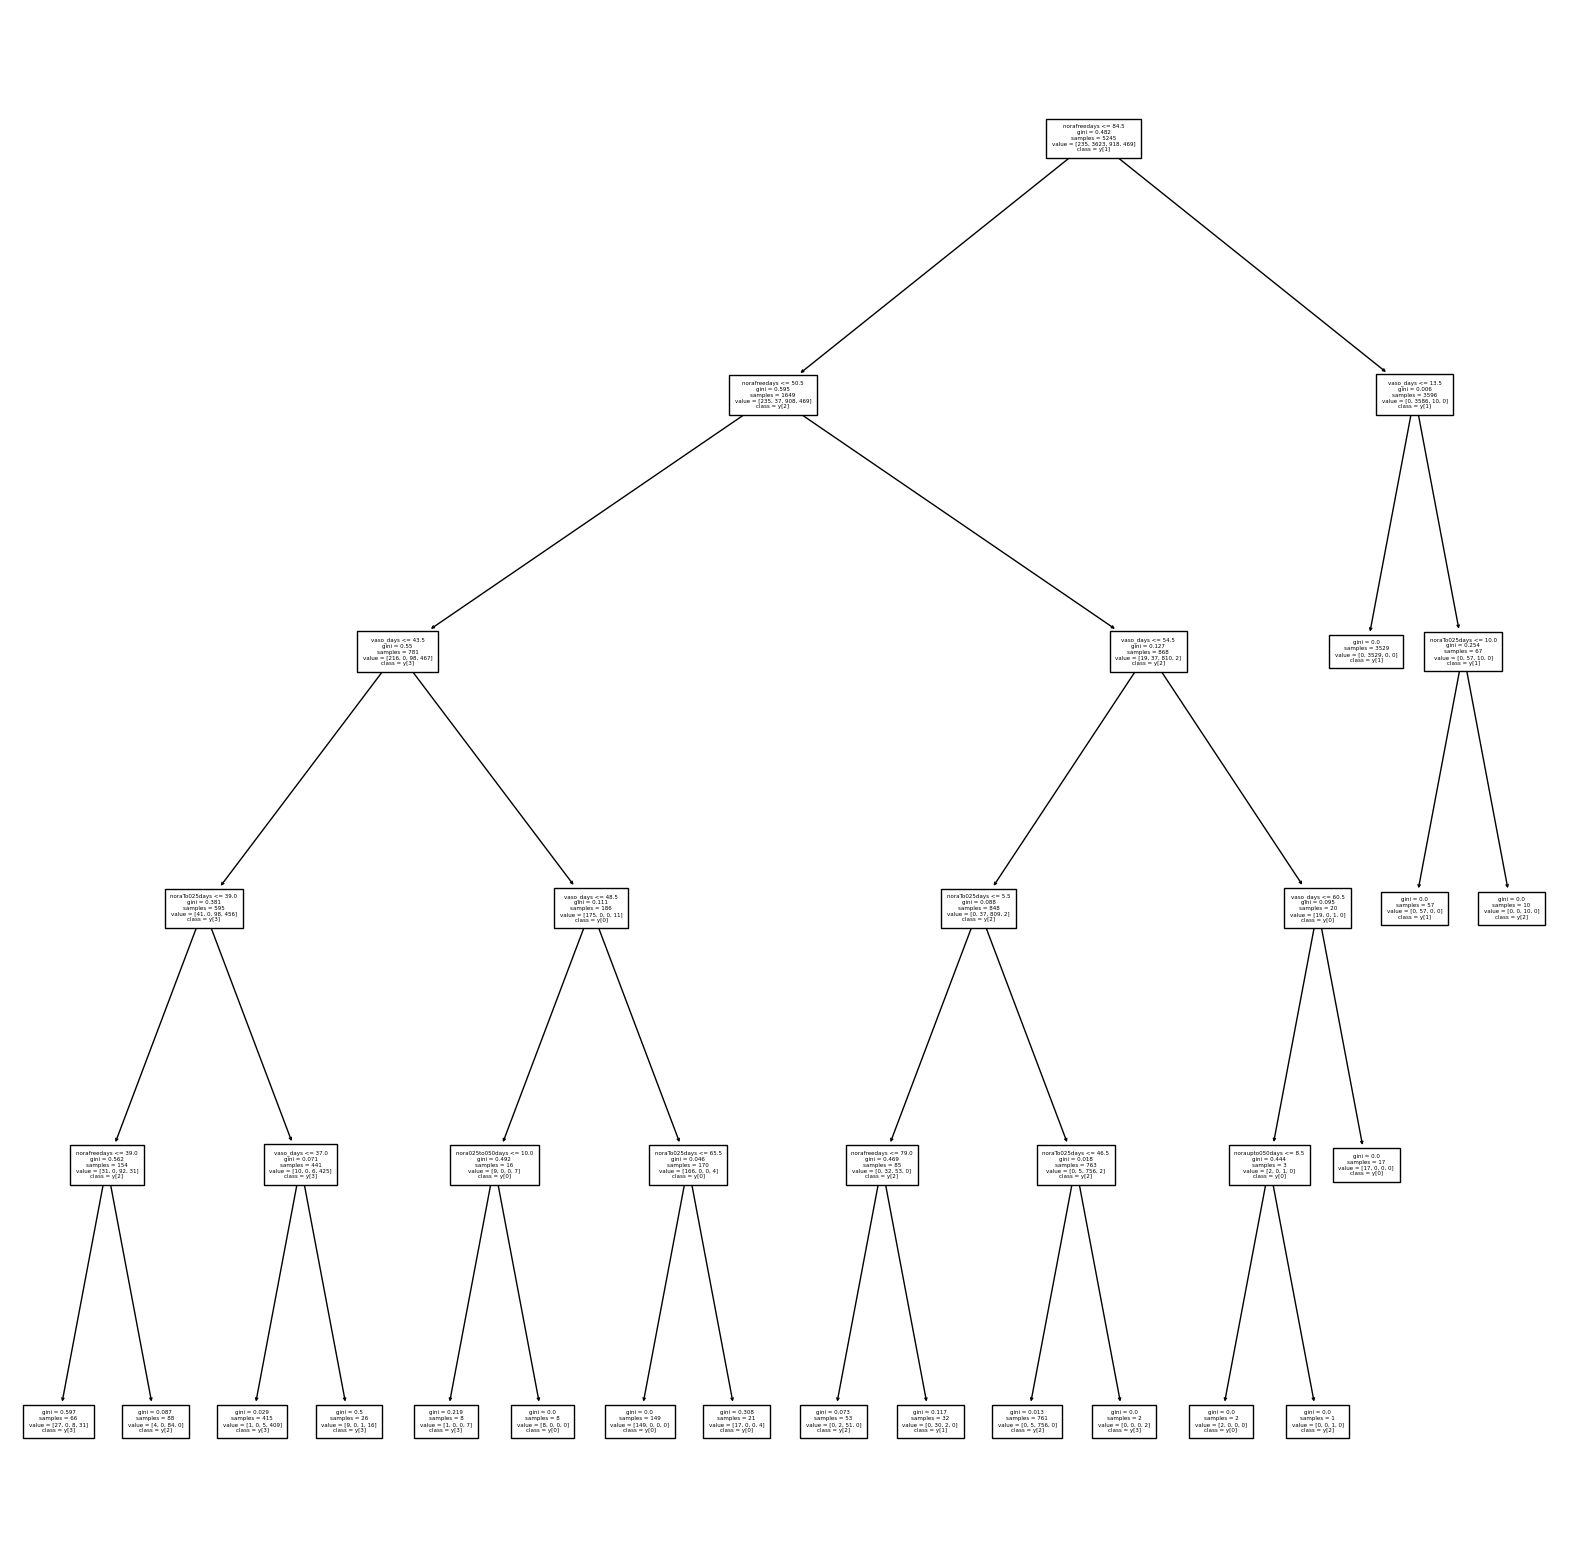

In [21]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print('\t\t\t\tTEST\n', classification_report(y_test, y_pred))
print('\t\t\t\tTRAIN\n', classification_report(y_train, y_pred_train))

plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=df.columns, class_names=True, fontsize=4)
plt.show()

In [24]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold
values = model.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 35 nodes and has the following tree structure:

node=0 is a split node with value=[[ 235. 3623.  918.  469.]]: go to node 1 if X[:, 3] <= 84.5 else to node 30.
	node=1 is a split node with value=[[235.  37. 908. 469.]]: go to node 2 if X[:, 3] <= 50.5 else to node 17.
		node=2 is a split node with value=[[216.   0.  98. 467.]]: go to node 3 if X[:, 4] <= 43.5 else to node 10.
			node=3 is a split node with value=[[ 41.   0.  98. 456.]]: go to node 4 if X[:, 0] <= 39.0 else to node 7.
				node=4 is a split node with value=[[31.  0. 92. 31.]]: go to node 5 if X[:, 3] <= 39.0 else to node 6.
					node=5 is a leaf node with value=[[27.  0.  8. 31.]].
					node=6 is a leaf node with value=[[ 4.  0. 84.  0.]].
				node=7 is a split node with value=[[ 10.   0.   6. 425.]]: go to node 8 if X[:, 4] <= 37.0 else to node 9.
					node=8 is a leaf node with value=[[  1.   0.   5. 409.]].
					node=9 is a leaf node with value=[[ 9.  0.  1. 16.]].
			node=10 is a split n

In [ ]:
node_indicator = model.decision_path(X_test)
leaf_id = model.apply(X_test)

sample_id = 4
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test.iloc[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 4:

decision node 0 : (X_test[4, 8] = 4) > 2.5)
decision node 26 : (X_test[4, 3] = 10) <= 62.5)
decision node 27 : (X_test[4, 5] = 0) <= 0.5)
decision node 28 : (X_test[4, 6] = 0) <= 0.5)
decision node 29 : (X_test[4, 3] = 10) <= 55.5)


In [25]:
#criando um dicionário com as variáveis
dic = {'score':model.feature_importances_,'features':X.columns}
#criando um dataframe com os dados
df1 = pd.DataFrame(dic).sort_values('score',ascending=False)
df1
#dic

,score,features
3,0.839481,norafreedays
4,0.094946,vaso_days
0,0.062506,noraTo025days
1,0.002519,nora025to050days
2,0.000548,noraupto050days
5,0.000000,hemodialysis
6,0.000000,MV_return
7,0.000000,MV_start
8,0.000000,MV_stay
9,0.000000,MV_weaning
